# Tarea 14 Aprendiendo Keras

## Part 3 of deeplizard tutorial on Keras

link >> https://www.youtube.com/watch?v=3FwGDUD_ZuQ&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=3

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels  = []
train_samples = []

## Creado del training set 

5% de la poblacion joven tuvo efectos secundarios y 5% de la poblacion vieja no

In [3]:
for i in range(50):
    # joven que tuvo efectos secundarios
    train_samples.append(randint(13,64))
    train_labels.append(1)
    
    # Viejo que no tuvo efectos secundarios
    train_samples.append(randint(65,100))
    train_labels.append(0)

In [4]:
for i in range(1000):
    # joven que no tuvo efectos secundarios
    train_samples.append(randint(13,64))
    train_labels.append(0)
    
    # Viejo que tuvo efectos secundarios
    train_samples.append(randint(65,100))
    train_labels.append(1)

## De array normal a numpy array

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

### Reduccion del alcance de los numeros para facilitar operaciones

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
print(scaled_train_samples)

[[0.42528736]
 [0.45977011]
 [0.14942529]
 ...
 [0.2183908 ]
 [0.25287356]
 [0.62068966]]


## Part 4 del tutorial de deeplizard para Keras

link >> https://www.youtube.com/watch?v=HrfrN3hn7QE&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=4

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

Pongo esta nota por si se requiere habilitar GPU

Pero dado que mi computadora no tiene una GPU lo voy a dejar como un raw text

In [9]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Part 5 del tutorial de deeplizard para Keras

link >> https://www.youtube.com/watch?v=I8eI4ZhcYdM&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=5

Compilamos el modelo, se prepara para usarse y entrenarse

In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Entrenamos el modelo

In [12]:
model.fit(
    x=scaled_train_samples,
    y=train_labels,
    batch_size=10,
    epochs=30,
    shuffle=True,
    verbose=2
)

Epoch 1/30
210/210 - 1s - loss: 0.6590 - accuracy: 0.5538
Epoch 2/30
210/210 - 0s - loss: 0.6350 - accuracy: 0.6062
Epoch 3/30
210/210 - 0s - loss: 0.6080 - accuracy: 0.6867
Epoch 4/30
210/210 - 0s - loss: 0.5792 - accuracy: 0.7300
Epoch 5/30
210/210 - 0s - loss: 0.5491 - accuracy: 0.7657
Epoch 6/30
210/210 - 0s - loss: 0.5169 - accuracy: 0.8014
Epoch 7/30
210/210 - 0s - loss: 0.4846 - accuracy: 0.8338
Epoch 8/30
210/210 - 0s - loss: 0.4537 - accuracy: 0.8505
Epoch 9/30
210/210 - 0s - loss: 0.4254 - accuracy: 0.8595
Epoch 10/30
210/210 - 0s - loss: 0.4000 - accuracy: 0.8819
Epoch 11/30
210/210 - 0s - loss: 0.3774 - accuracy: 0.8910
Epoch 12/30
210/210 - 0s - loss: 0.3584 - accuracy: 0.9119
Epoch 13/30
210/210 - 0s - loss: 0.3423 - accuracy: 0.9114
Epoch 14/30
210/210 - 0s - loss: 0.3285 - accuracy: 0.9205
Epoch 15/30
210/210 - 0s - loss: 0.3170 - accuracy: 0.9233
Epoch 16/30
210/210 - 0s - loss: 0.3074 - accuracy: 0.9243
Epoch 17/30
210/210 - 0s - loss: 0.2995 - accuracy: 0.9319
Epoch 

### Part 6 del tutorial de deeplizard para Keras

link >> https://www.youtube.com/watch?v=U8Ixc2OLSkQ&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=6

Armamos un modelo diferente pero con la misma estructura

In [13]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [16]:
model.fit(
    x=scaled_train_samples,
    y=train_labels,
    validation_split=0.1, # Porcentaje de los valores que seran usados como testing set
    batch_size=10,
    epochs=30,
    shuffle=True, # este Shuffle se hace DESPUES de partir el training/validation set
    # se debe hacer shuffle antes para nos sesgar incorrectamente el modelo
    verbose=2
)

Epoch 1/30
189/189 - 1s - loss: 0.6883 - accuracy: 0.4714 - val_loss: 0.6757 - val_accuracy: 0.5619
Epoch 2/30
189/189 - 0s - loss: 0.6653 - accuracy: 0.6048 - val_loss: 0.6465 - val_accuracy: 0.6810
Epoch 3/30
189/189 - 0s - loss: 0.6325 - accuracy: 0.6952 - val_loss: 0.6114 - val_accuracy: 0.7619
Epoch 4/30
189/189 - 0s - loss: 0.6008 - accuracy: 0.7492 - val_loss: 0.5808 - val_accuracy: 0.7810
Epoch 5/30
189/189 - 0s - loss: 0.5713 - accuracy: 0.7746 - val_loss: 0.5509 - val_accuracy: 0.8190
Epoch 6/30
189/189 - 0s - loss: 0.5412 - accuracy: 0.8106 - val_loss: 0.5199 - val_accuracy: 0.8238
Epoch 7/30
189/189 - 0s - loss: 0.5111 - accuracy: 0.8259 - val_loss: 0.4900 - val_accuracy: 0.8286
Epoch 8/30
189/189 - 0s - loss: 0.4816 - accuracy: 0.8481 - val_loss: 0.4618 - val_accuracy: 0.8476
Epoch 9/30
189/189 - 0s - loss: 0.4537 - accuracy: 0.8566 - val_loss: 0.4355 - val_accuracy: 0.8571
Epoch 10/30
189/189 - 0s - loss: 0.4278 - accuracy: 0.8730 - val_loss: 0.4113 - val_accuracy: 0.8762

### Part 7 del tutorial de deeplizard para Keras

link >> https://www.youtube.com/watch?v=q-HkgmJ4aR8&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=7

In [17]:
test_labels  = []
test_samples = []

## Creado del testing set 

5% de la poblacion joven tuvo efectos secundarios y 5% de la poblacion vieja no

In [18]:
for i in range(50):
    # joven que tuvo efectos secundarios
    test_samples.append(randint(13,64))
    test_labels.append(1)
    
    # Viejo que no tuvo efectos secundarios
    test_samples.append(randint(65,100))
    test_labels.append(0)

for i in range(1000):
    # joven que no tuvo efectos secundarios
    test_samples.append(randint(13,64))
    test_labels.append(0)
    
    # Viejo que tuvo efectos secundarios
    test_samples.append(randint(65,100))
    test_labels.append(1)

In [19]:
test_samples = np.array(test_samples)
test_labels  = np.array(test_labels)
test_labels, test_samples = shuffle(test_labels, test_samples)
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

#### Usar el modelo entrenado para probar con el testing set

In [20]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

## Explicacion

Los valores que se encuentran en el arreglo regresado son probabilidades de estar en la condicion columna 0, columna 1, ..., columna n.

Dado que nuestro modelo unicamente tiene 2 neuronas de salida, la probabilidad de estar en la columna 0 significa la probabilidad de que NO presente sintomas extra (porque el valor 0 es NO). 

Y la probabilidad de estar en la columna 1 es la probabilidad de que SI presente sintomas extra.

In [21]:
print(predictions)

[[0.02547421 0.9745258 ]
 [0.9616637  0.03833628]
 [0.82541054 0.17458946]
 ...
 [0.08666598 0.9133341 ]
 [0.02052774 0.9794723 ]
 [0.616099   0.38390097]]


In [22]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [23]:
print(rounded_predictions)

[1 0 0 ... 1 1 0]


### Part 8 del tutorial de deeplizard para Keras

link >> https://www.youtube.com/watch?v=VYGVOwlT4oE&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=8

### Confusion Matrix
Con Matplotlib y SKLearn

In [24]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

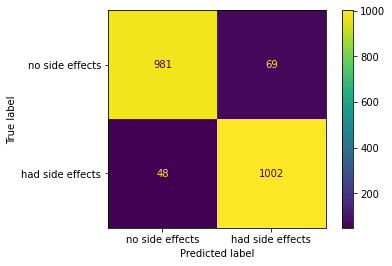

In [26]:
cm_plot_labels = ["no side effects","had side effects"]
result = ConfusionMatrixDisplay(cm, display_labels=cm_plot_labels)
result.plot()

### Part 9 del tutorial de deeplizard para Keras

link >> https://www.youtube.com/watch?v=8Nl-of5C3uA&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=9

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [28]:
import os.path

FILENAME = "models/medical_trail_model.h5"

if os.path.isfile(FILENAME) is True:
    print("Se ha sobreescrito el modelo anterior")
model.save(FILENAME)

Se ha sobreescrito el modelo anterior


Esta funcion se usa para:
 - Guardar la architectura que usa nuestro modelo
 - Guardar los pesos entrenados del modelo
 - Guardar la configuracion
 - Guardar el estado del optimizador, permitiendo continuar el entrenamiento donde se quedo

In [29]:
from tensorflow.keras.models import load_model
new_model = load_model(FILENAME)

In [30]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [31]:
new_model.get_weights()

[array([[-0.31877097,  0.18405463,  0.3408505 , -0.56110215,  0.31025732,
         -0.25287798, -0.38498867, -0.08639169, -0.06081465, -0.0240261 ,
          0.54805666,  0.757798  ,  0.4582625 , -0.20952031, -0.2009443 ,
          0.250699  ]], dtype=float32),
 array([ 0.        ,  0.193411  , -0.05382362,  0.        , -0.1065341 ,
         0.        ,  0.        ,  0.        ,  0.23777844,  0.        ,
        -0.12795024, -0.1298147 , -0.13924381,  0.        ,  0.        ,
        -0.08782001], dtype=float32),
 array([[ 0.3360248 , -0.04573336, -0.08476919,  0.23289856,  0.0599393 ,
         -0.00156391,  0.1016866 ,  0.20952353,  0.15855023, -0.15826175,
         -0.09410083, -0.32459596,  0.04708654, -0.04921192,  0.20981327,
          0.09471896, -0.2540605 ,  0.32192877, -0.193846  ,  0.29554203,
         -0.1642627 , -0.04638252, -0.17439042, -0.14772908,  0.19634327,
         -0.18432629,  0.19365117,  0.1290378 , -0.1356777 , -0.03158283,
         -0.23162821, -0.32781735],
 

In [32]:
new_model.optimizer

#### Model to JSON

Esta forma no guarda los pesos, **solo la architectura**

In [33]:
# Save as JSON
jsonString = model.to_json()

# Save as YAML
# yamlString = model.to_yaml()

In [34]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(jsonString)

# from tensorflow.keras.models import model_from_yaml
# model_architecture = model_from_yaml(yamlString)

model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### Save the weights

Esta funcion solo guarda los pesos del modelo.

Cuando se cargan en un modelo, este debe de tener la misma arquitectura que el de los pesos guardados. De otra forma salta un error.

In [35]:
FILENAME_WEIGHTS = "models/my_model_weights.h5"
if os.path.isfile(FILENAME_WEIGHTS) is True:
    print("Se han sobreescrito los pesos del modelo guardado")
model.save_weights(FILENAME_WEIGHTS)

Se han sobreescrito los pesos del modelo guardado


In [36]:
model2 = Sequential([
    Dense(units=16, activation="relu", input_shape=(1,)),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [37]:
model2.load_weights(FILENAME_WEIGHTS)

In [38]:
model2.get_weights()

[array([[-0.31877097,  0.18405463,  0.3408505 , -0.56110215,  0.31025732,
         -0.25287798, -0.38498867, -0.08639169, -0.06081465, -0.0240261 ,
          0.54805666,  0.757798  ,  0.4582625 , -0.20952031, -0.2009443 ,
          0.250699  ]], dtype=float32),
 array([ 0.        ,  0.193411  , -0.05382362,  0.        , -0.1065341 ,
         0.        ,  0.        ,  0.        ,  0.23777844,  0.        ,
        -0.12795024, -0.1298147 , -0.13924381,  0.        ,  0.        ,
        -0.08782001], dtype=float32),
 array([[ 0.3360248 , -0.04573336, -0.08476919,  0.23289856,  0.0599393 ,
         -0.00156391,  0.1016866 ,  0.20952353,  0.15855023, -0.15826175,
         -0.09410083, -0.32459596,  0.04708654, -0.04921192,  0.20981327,
          0.09471896, -0.2540605 ,  0.32192877, -0.193846  ,  0.29554203,
         -0.1642627 , -0.04638252, -0.17439042, -0.14772908,  0.19634327,
         -0.18432629,  0.19365117,  0.1290378 , -0.1356777 , -0.03158283,
         -0.23162821, -0.32781735],
 